# Algorithm implementation notebook

In [1]:
import sys
import getpass
from pathlib import Path

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import pyedflib
from pandas.compat import StringIO

import hrvanalysis
from ecgdetectors import Detectors
import heartpy as hp

In [5]:
user = getpass.getuser()
data_path = '/Users/{}/GitHub/fydp-data-science/sample_files/'.format(user)

# hasn't been created yet -- either develop own or get from ONDRI
metadata = data_path + 'metadata.edf'

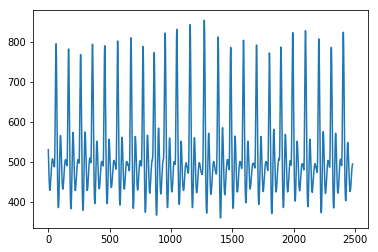

In [12]:
data, _ = hp.load_exampledata(0)
df = pd.DataFrame(data).rename(columns={0:'value'})
plt.plot(df.value)

In [15]:
working_data, measures = hp.process(df.value, 100)

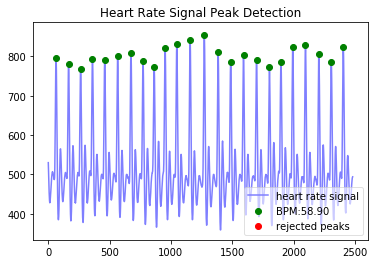

In [16]:
hp.plotter(working_data, measures)

In [17]:
measures

{'bpm': 58.898847631242,
 'ibi': 1018.695652173913,
 'sdnn': 65.76006108019,
 'sdsd': 34.866925292300195,
 'rmssd': 64.73723110319973,
 'pnn20': 0.8636363636363636,
 'pnn50': 0.4090909090909091,
 'hr_mad': 40.0,
 'sd1': 45.75807746062504,
 'sd2': 82.92683223259064,
 's': 11921.000815765336,
 'sd1/sd2': 0.5517885614186272,
 'breathingrate': 0.12804097311139565}

In [21]:
# instantiating variables
# this window and shift doesn't work, becauses it is based on a certain number of indexes, whereas the paper was talking about 560RR intervals
# will need to fix and update this
sampling_frequency = 100 # this is whatever the hardware gives us

window_size = 560
shift = 20
n_intervals = 4

start_index = 0
end_index = window_size

mean_bpm_shift = 5
rmssd_shift = -9
pnn50_shift = -9

stress_event = False
stress_results = []

In [34]:
def find_percent_difference(first_val, second_val):
   
    diff = ((second_val - first_val) / first_val)*100
    
    return diff

In [ ]:

# have to find a way to deal with this edge case in which we don't have 560 points before the end of the data set
while end_index <= len(df.value):
    
    
    # grab window
    window = df.value[start_index : end_index]
    
    # split window into n intervals
    intervals = [window[x : x + int(window_size/n_intervals)] for x in range(start_index, end_index, int(window_size/n_intervals))]
    
    mean_bpm = []
    rmssd = []
    pnn50 = []
    
    for i in intervals:
        working_data, measures = hp.process(i, sampling_frequency)
        
        mean_bpm.append(measures['bpm'])
        rmssd.append(measures['rmssd'])
        pnn50.append(measures['pnn50'])
        
    # compare hrv features
    mean_bpm_diff = find_percent_difference(mean_bpm[0], mean_bpm[n_intervals-1])
    rmssd_diff = find_percent_difference(rmssd[n_intervals-2], rmssd[n_intervals-1])
    pnn50_diff = find_percent_difference(pnn50[n_intervals-2], pnn50[n_intervals-1])

    # see if features depict stress
    if (mean_bpm_diff > mean_bpm_shift) and (rmssd_diff < rmssd_shift) and (pnn50_diff < pnn50_shift):
        stress_event = True
        
    elif (mean_bpm_diff < -mean_bpm_shift) and (rmssd_diff > -rmssd_shift) and (pnn50_diff > -pnn50_shift):
        stress_event = False
    
    # push stress result
    stress_results.append(stress_event)
    
    start_index = start_index + shift
    end_index = end_index + shift

In [4]:
# the pan tompkins detector seems to be the most used R peak detector
# assuming that this returns a list of peak indices
r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)

### function for calculating bpm

In [ ]:
def calculate_bpm(data, r_peaks):
    
    
    
    